In [ ]:
## ------------------------------ ##
## ---- Install dependencies ---- ##
## ------------------------------ ##

!pip install numpy
!pip install tifffile
!pip install noise
!pip install matplotlib

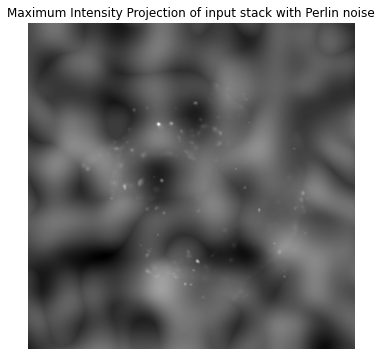

In [20]:
## ------------------------------- ##
## ---- Generate Perlin noise ---- ##
## ------------------------------- ##

# Import libraries
import numpy as np
import tifffile as tf
import noise
import matplotlib.pyplot as plt
import random

EPSILON = 0.0000001

# Read TIF stack
input_stack_path = "*/input.tif"
input_stack = tf.imread(input_stack_path)

# Normalize signal
signal_min = np.min(input_stack)
signal_max = np.max(input_stack)
normalized_signal = (input_stack - signal_min) / (signal_max - signal_min+EPSILON)

# Set Seed for Perlin Noise
random.seed(42)  # Set the seed to a specific value for reproducibility

# Generate Perlin noise
noise_shape = input_stack.shape
scale = 50  # Adjust this parameter to control the frequency of the noise (frequency=1/scale).
perlin_noise = np.empty(noise_shape)
for i in range(noise_shape[0]):
    for j in range(noise_shape[1]):
        for k in range(noise_shape[2]):
            perlin_noise[i, j, k] = noise.pnoise3(i / scale, j / scale, k / scale)

# Scale noise to match signal intensity
noise_min = np.min(perlin_noise)
noise_max = np.max(perlin_noise)
scaled_noise = (perlin_noise - noise_min) / (noise_max - noise_min+EPSILON)

# Adjust the strength of the noise
noise_strength = 1  # Adjust this factor to control noise intensity
stack_with_noise = normalized_signal + noise_strength * scaled_noise

# Compute Maximum Intensity Projection
mip_with_noise = np.max(stack_with_noise, axis=0)

# Display the MIP image
plt.figure(figsize=(8, 6))
plt.imshow(mip_with_noise, cmap='gray')
plt.title('Maximum Intensity Projection of input stack with Perlin noise')
plt.axis('off')
plt.show()

# Save Output as TIF
output_stack_path = "*/output_stack_with_noise.tif"
tf.imwrite(output_stack_path, stack_with_noise)
